In [51]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [52]:
x = np.linspace(0,5,100)
y = 2 * x + 1 + np.random.randn(*x.shape) * 0.3

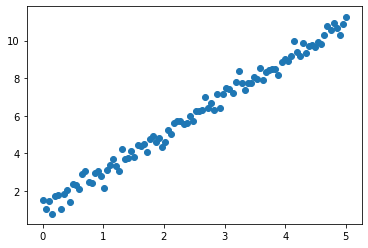

In [53]:
plt.scatter(x, y)
plt.show()

In [54]:
class LinearModel(object):
    def __init__(self):
        self.W = tf.Variable(1.1)
        self.b = tf.Variable(0.0)
    def __call__(self, x):
        return self.W * x  + self.b

In [55]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [56]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)
        

In [57]:
model = LinearModel()
Ws, bs, losses = [], [], []
epochs = range(50)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(x), y)
    losses.append(current_loss)
    
    train(model, x, y, learning_rate=0.01)
    print('Epoch %2d: W=%1.2f, b=%1.2f,loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=1.10, b=0.00,loss=12.46115
Epoch  1: W=1.30, b=0.07,loss=8.39870
Epoch  2: W=1.47, b=0.12,loss=5.68572
Epoch  3: W=1.60, b=0.16,loss=3.87380
Epoch  4: W=1.71, b=0.20,loss=2.66355
Epoch  5: W=1.80, b=0.23,loss=1.85504
Epoch  6: W=1.87, b=0.26,loss=1.31479
Epoch  7: W=1.93, b=0.28,loss=0.95366
Epoch  8: W=1.98, b=0.30,loss=0.71214
Epoch  9: W=2.02, b=0.31,loss=0.55049
Epoch 10: W=2.05, b=0.33,loss=0.44218
Epoch 11: W=2.07, b=0.34,loss=0.36948
Epoch 12: W=2.10, b=0.35,loss=0.32056
Epoch 13: W=2.11, b=0.36,loss=0.28753
Epoch 14: W=2.13, b=0.37,loss=0.26511
Epoch 15: W=2.14, b=0.37,loss=0.24977
Epoch 16: W=2.15, b=0.38,loss=0.23917
Epoch 17: W=2.15, b=0.38,loss=0.23174
Epoch 18: W=2.16, b=0.39,loss=0.22643
Epoch 19: W=2.16, b=0.39,loss=0.22253
Epoch 20: W=2.17, b=0.40,loss=0.21958
Epoch 21: W=2.17, b=0.40,loss=0.21727
Epoch 22: W=2.17, b=0.41,loss=0.21538
Epoch 23: W=2.17, b=0.41,loss=0.21379
Epoch 24: W=2.17, b=0.41,loss=0.21239
Epoch 25: W=2.17, b=0.42,loss=0.21113
Epoch 26: W

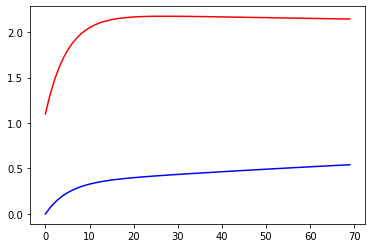

In [58]:
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.show()

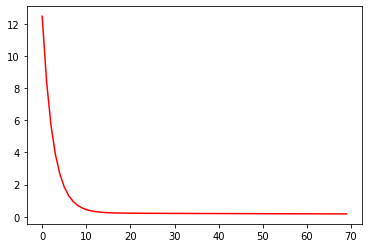

In [59]:
plt.plot(epochs, losses, 'r')
plt.show()

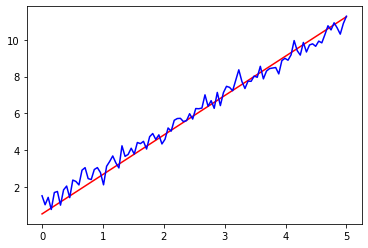

In [60]:
plt.plot(x, model(x), 'r', x, y, 'b')
plt.show()